In [1]:
# Load the wine dataset
import pandas as pd
from sklearn.datasets import load_wine

wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np

# Variants
data_raw = df.copy()
data_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
data_log = np.log1p(df)
log_normalized = pd.DataFrame(MinMaxScaler().fit_transform(data_log), columns=df.columns)
data_pca = pd.DataFrame(PCA(n_components=2).fit_transform(df), columns=["PC1", "PC2"])
data_log_norm_pca = pd.DataFrame(PCA(n_components=2).fit_transform(log_normalized), columns=["PC1", "PC2"])

preprocessed_sets = {
    "Raw": data_raw,
    "Normalized": data_normalized,
    "Transformed": data_log,
    "PCA": data_pca,
    "T+N": log_normalized,
    "T+N+PCA": data_log_norm_pca
}


In [3]:
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering(X, labels):
    return (
        silhouette_score(X, labels),
        calinski_harabasz_score(X, labels),
        davies_bouldin_score(X, labels)
    )


In [4]:
kmeans_results = {}

for name, dataset in preprocessed_sets.items():
    kmeans_results[name] = {}
    for k in [3, 4, 5]:
        try:
            kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
            labels = kmeans.fit_predict(dataset)
            kmeans_results[name][f'k={k}'] = dict(zip(
                ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"],
                evaluate_clustering(dataset, labels)
            ))
        except:
            kmeans_results[name][f'k={k}'] = {"Silhouette": None, "Calinski-Harabasz": None, "Davies-Bouldin": None}

print("KMeans Results:")
for preproc, metrics in kmeans_results.items():
    print(f"\nPreprocessing: {preproc}")
    print(pd.DataFrame(metrics).T)


c:\Users\knslv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\knslv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\knslv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\knslv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

KMeans Results:

Preprocessing: Raw
     Silhouette  Calinski-Harabasz  Davies-Bouldin
k=3    0.571138         561.815658        0.534243
k=4    0.545020         599.825000        0.556945
k=5    0.547709         726.666943        0.537837

Preprocessing: Normalized
     Silhouette  Calinski-Harabasz  Davies-Bouldin
k=3    0.301350          83.309389        1.311826
k=4    0.233285          63.704640        1.587633
k=5    0.206662          53.362697        1.852585

Preprocessing: Transformed
     Silhouette  Calinski-Harabasz  Davies-Bouldin
k=3    0.391712         120.005918        1.023407
k=4    0.321844          90.938811        1.324154
k=5    0.283791          81.220963        1.521700

Preprocessing: PCA
     Silhouette  Calinski-Harabasz  Davies-Bouldin
k=3    0.572255         562.518752        0.532969
k=4    0.546218         600.962357        0.555919
k=5    0.549321         728.831856        0.536303

Preprocessing: T+N
     Silhouette  Calinski-Harabasz  Davies-Bouldin
k=

In [5]:
hierarchical_results = {}

for name, dataset in preprocessed_sets.items():
    hierarchical_results[name] = {}
    for k in [3, 4, 5]:
        try:
            hc = AgglomerativeClustering(n_clusters=k)
            labels = hc.fit_predict(dataset)
            hierarchical_results[name][f'k={k}'] = dict(zip(
                ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"],
                evaluate_clustering(dataset, labels)
            ))
        except:
            hierarchical_results[name][f'k={k}'] = {"Silhouette": None, "Calinski-Harabasz": None, "Davies-Bouldin": None}

print("Hierarchical Clustering Results:")
for preproc, metrics in hierarchical_results.items():
    print(f"\nPreprocessing: {preproc}")
    print(pd.DataFrame(metrics).T)


Hierarchical Clustering Results:

Preprocessing: Raw
     Silhouette  Calinski-Harabasz  Davies-Bouldin
k=3    0.564480         552.851712        0.535734
k=4    0.560673         670.625991        0.553574
k=5    0.507484         684.222613        0.551315

Preprocessing: Normalized
     Silhouette  Calinski-Harabasz  Davies-Bouldin
k=3    0.294829          81.327639        1.318311
k=4    0.248703          63.514869        1.752870
k=5    0.204154          52.277043        1.936776

Preprocessing: Transformed
     Silhouette  Calinski-Harabasz  Davies-Bouldin
k=3    0.377289         111.985609        1.072687
k=4    0.314883          87.370936        1.473524
k=5    0.242794          76.955221        1.586243

Preprocessing: PCA
     Silhouette  Calinski-Harabasz  Davies-Bouldin
k=3    0.565581         553.531654        0.534284
k=4    0.561920         672.022774        0.552330
k=5    0.500913         685.285260        0.556345

Preprocessing: T+N
     Silhouette  Calinski-Harabasz  

In [6]:
mean_shift_results = {}

for name, dataset in preprocessed_sets.items():
    try:
        ms = MeanShift()
        labels = ms.fit_predict(dataset)
        n_clusters = len(np.unique(labels))
        if n_clusters > 1:
            scores = evaluate_clustering(dataset, labels)
        else:
            scores = (None, None, None)

        mean_shift_results[name] = {
            "Clusters Found": n_clusters,
            "Silhouette": scores[0],
            "Calinski-Harabasz": scores[1],
            "Davies-Bouldin": scores[2]
        }

    except:
        mean_shift_results[name] = {
            "Clusters Found": "Error",
            "Silhouette": None,
            "Calinski-Harabasz": None,
            "Davies-Bouldin": None
        }

print("\nMean Shift Clustering Results:")
print(pd.DataFrame(mean_shift_results).T)



Mean Shift Clustering Results:
             Clusters Found  Silhouette  Calinski-Harabasz  Davies-Bouldin
Raw                     3.0    0.502492         454.058943        0.556150
Normalized              1.0         NaN                NaN             NaN
Transformed             2.0    0.317306          81.569543        1.283705
PCA                     3.0    0.503221         454.540465        0.555116
T+N                     3.0    0.307468          47.483952        1.003065
T+N+PCA                 3.0    0.596275         423.382946        0.550034


c:\Users\knslv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


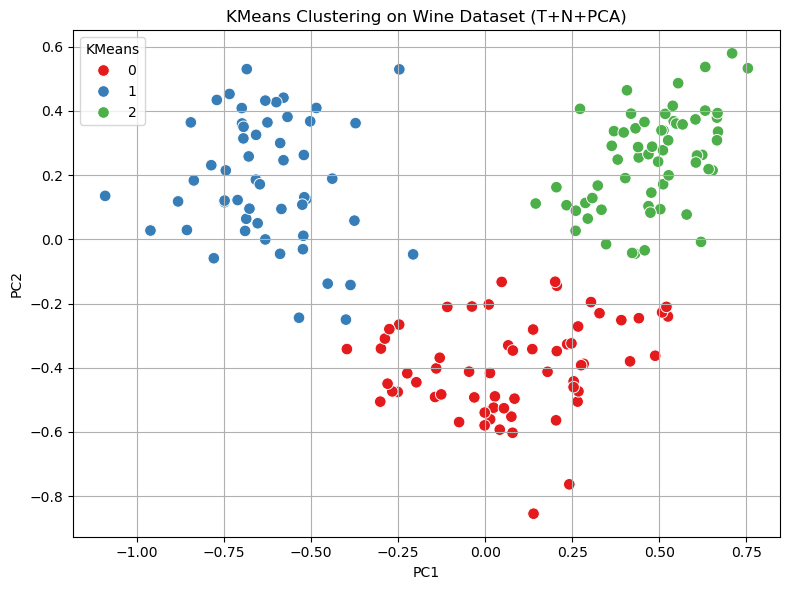

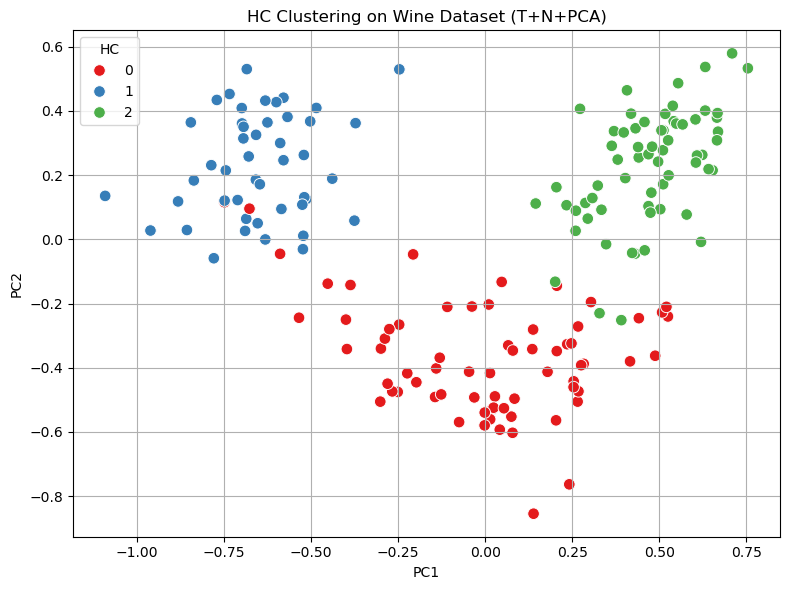

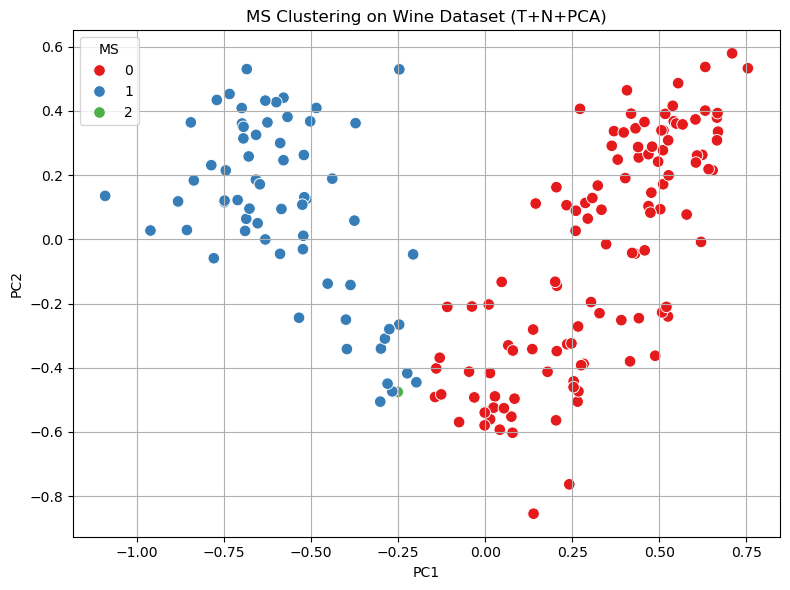

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use T+N+PCA
plot_data = data_log_norm_pca.copy()
plot_data["KMeans"] = KMeans(n_clusters=3, random_state=0, n_init='auto').fit_predict(log_normalized)
plot_data["HC"] = AgglomerativeClustering(n_clusters=3).fit_predict(log_normalized)
plot_data["MS"] = MeanShift().fit_predict(log_normalized)

def plot_clusters_2D(df, method):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="PC1", y="PC2", hue=method, data=df, palette="Set1", s=70)
    plt.title(f"{method} Clustering on Wine Dataset (T+N+PCA)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_clusters_2D(plot_data, "KMeans")
plot_clusters_2D(plot_data, "HC")
plot_clusters_2D(plot_data, "MS")
